In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Load the dataset
df = pd.read_csv("global_water_consumption.csv")

In [31]:
# Display first 5 rows
print(df.head())

     Country  Year  Total Water Consumption (Billion Cubic Meters)  \
0  Indonesia  2022                                          895.15   
1  Indonesia  2024                                          502.89   
2      Spain  2000                                          843.39   
3     Canada  2021                                          803.34   
4     Brazil  2022                                          416.40   

   Per Capita Water Use (Liters per Day) Water Scarcity Level  \
0                                 489.73                  Low   
1                                 311.95                 High   
2                                 440.09               Medium   
3                                 478.98                 High   
4                                 353.91                 High   

   Agricultural Water Use (%)  Industrial Water Use (%)  \
0                       20.78                     13.75   
1                       48.51                      8.44   
2          

In [39]:
df.shape

(5000, 10)

In [32]:
# Check data types and missing values
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Country                                         5000 non-null   object 
 1   Year                                            5000 non-null   int64  
 2   Total Water Consumption (Billion Cubic Meters)  5000 non-null   float64
 3   Per Capita Water Use (Liters per Day)           5000 non-null   float64
 4   Water Scarcity Level                            5000 non-null   object 
 5   Agricultural Water Use (%)                      5000 non-null   float64
 6   Industrial Water Use (%)                        5000 non-null   float64
 7   Household Water Use (%)                         5000 non-null   float64
 8   Rainfall Impact (Annual Precipitation in mm)    5000 non-null   float64
 9   Groundwater Depletion Rate (%)           

In [33]:
# Summary statistics
print(df.describe())

              Year  Total Water Consumption (Billion Cubic Meters)  \
count  5000.000000                                     5000.000000   
mean   2012.204400                                      503.459606   
std       7.205484                                      284.457947   
min    2000.000000                                       10.050000   
25%    2006.000000                                      259.677500   
50%    2012.000000                                      499.515000   
75%    2018.000000                                      751.797500   
max    2024.000000                                      999.680000   

       Per Capita Water Use (Liters per Day)  Agricultural Water Use (%)  \
count                            5000.000000                 5000.000000   
mean                              276.034040                   50.281704   
std                               129.853417                   17.397782   
min                                50.110000                   20

In [40]:
df.describe().T

count         mean  \
Year                                            5000.0  2012.204400   
Total Water Consumption (Billion Cubic Meters)  5000.0   503.459606   
Per Capita Water Use (Liters per Day)           5000.0   276.034040   
Agricultural Water Use (%)                      5000.0    50.281704   
Industrial Water Use (%)                        5000.0    27.753878   
Household Water Use (%)                         5000.0    24.814150   
Rainfall Impact (Annual Precipitation in mm)    5000.0  1547.793364   
Groundwater Depletion Rate (%)                  5000.0     2.574684   

                                                       std      min  \
Year                                              7.205484  2000.00   
Total Water Consumption (Billion Cubic Meters)  284.457947    10.05   
Per Capita Water Use (Liters per Day)           129.853417    50.11   
Agricultural Water Use (%)                       17.397782    20.01   
Industrial Water Use (%)                         12.873524     5.00   
Household Water Use (%)                           8.676702    10.00   
Rainfall Impact (Annual Precipitation in mm)    837.198704   100.59   
Groundwater Depletion Rate (%)                    1.421690     0.10   

                                                      25%       50%  \
Year                                            2006.0000  2012.000   
Total Water Consumption (Billion Cubic Meters)   259.6775   499.515   
Per Capita Water Use (Liters per Day)            163.7100   277.445   
Agricultural Water Use (%)                        35.2775    50.215   
Industrial Water Use (%)                          16.7875    27.980   
Household Water Use (%)                           17.3700    24.800   
Rainfall Impact (Annual Precipitation in mm)     833.5525  1535.670   
Groundwater Depletion Rate (%)                     1.3375     2.590   

                                                      75%      max  
Year                                            2018.0000  2024.00  
Total Water Consumption (Billion Cubic Meters)   751.7975   999.68  
Per Capita Water Use (Liters per Day)            388.9750   499.97  
Agricultural Water Use (%)                        65.4800    79.99  
Industrial Water Use (%)                          38.8225    50.00  
Household Water Use (%)                           32.3225    40.00  
Rainfall Impact (Annual Precipitation in mm)    2273.1475  2998.34  
Groundwater Depletion Rate (%)                     3.8225     5.00

Handle Missing Values

Country                                           0
Year                                              0
Total Water Consumption (Billion Cubic Meters)    0
Per Capita Water Use (Liters per Day)             0
Water Scarcity Level                              0
Agricultural Water Use (%)                        0
Industrial Water Use (%)                          0
Household Water Use (%)                           0
Rainfall Impact (Annual Precipitation in mm)      0
Groundwater Depletion Rate (%)                    0
dtype: int64


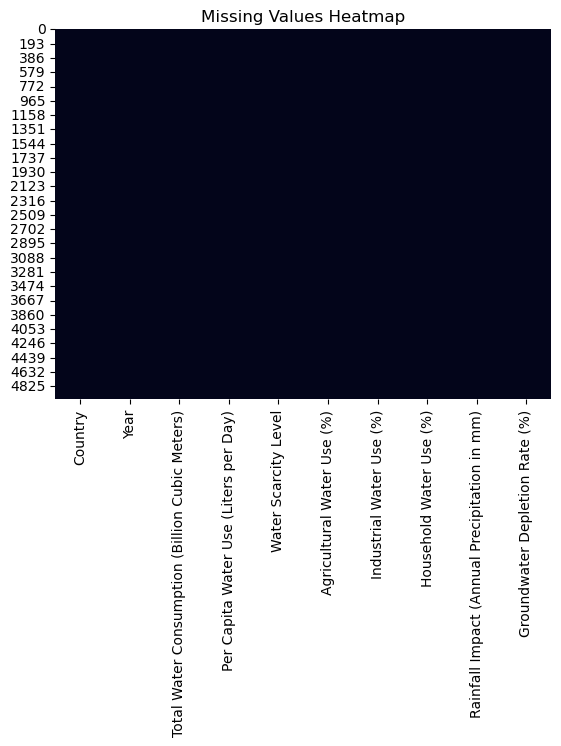

In [3]:
# Total missing values per column
print(df.isnull().sum())

# Visualize missing data
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [5]:
# Standardize categorical values (e.g., "Low" vs "low")
df["Water Scarcity Level"] = df["Water Scarcity Level"].str.capitalize()

# Check unique categories
print(df["Water Scarcity Level"].unique())  # Should output: ['Low', 'Medium', 'High']

['Low' 'High' 'Medium']


In [6]:
# Detect outliers in "Per Capita Water Use" using IQR
Q1 = df["Per Capita Water Use (Liters per Day)"].quantile(0.25)
Q3 = df["Per Capita Water Use (Liters per Day)"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = df[(df["Per Capita Water Use (Liters per Day)"] < lower_bound) | 
             (df["Per Capita Water Use (Liters per Day)"] > upper_bound)]
print("Outliers in Per Capita Water Use:\n", outliers)

# Investigate outliers (e.g., Turkey 2007 entry with 51.58 liters/day)

Outliers in Per Capita Water Use:
 Empty DataFrame
Columns: [Country, Year, Total Water Consumption (Billion Cubic Meters), Per Capita Water Use (Liters per Day), Water Scarcity Level, Agricultural Water Use (%), Industrial Water Use (%), Household Water Use (%), Rainfall Impact (Annual Precipitation in mm), Groundwater Depletion Rate (%)]
Index: []


In [9]:
# Update numerical_cols with the correct column names
numerical_cols = [
    "Total Water Consumption (Billion Cubic Meters)", 
    "Rainfall Impact (Annual Precipitation in mm)",  # Corrected name
    "Groundwater Depletion Rate (%)"
]

# Normalize numerical features
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [11]:
# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())

# Validate year range (2000-2024)
print("Years outside range:", df[(df["Year"] < 2000) | (df["Year"] > 2024)])

# Validate percentage columns (agricultural + industrial + household <= 100%)
df["Total Sector Use (%)"] = df["Agricultural Water Use (%)"] + \
                             df["Industrial Water Use (%)"] + \
                             df["Household Water Use (%)"]

invalid_rows = df[df["Total Sector Use (%)"] > 100]
print("Invalid sector use rows:\n", invalid_rows)

Duplicate rows: 0
Years outside range: Empty DataFrame
Columns: [Year, Total Water Consumption (Billion Cubic Meters), Per Capita Water Use (Liters per Day), Agricultural Water Use (%), Industrial Water Use (%), Household Water Use (%), Rainfall Impact (Annual Precipitation in mm), Groundwater Depletion Rate (%), Country_Argentina, Country_Australia, Country_Brazil, Country_Canada, Country_China, Country_France, Country_Germany, Country_India, Country_Indonesia, Country_Italy, Country_Japan, Country_Mexico, Country_Russia, Country_Saudi Arabia, Country_South Africa, Country_South Korea, Country_Spain, Country_Turkey, Country_UK, Country_USA, Water Scarcity Level_High, Water Scarcity Level_Low, Water Scarcity Level_Medium, Decade, Total Sector Use (%)]
Index: []

[0 rows x 33 columns]
Invalid sector use rows:
       Year  Total Water Consumption (Billion Cubic Meters)  \
5     2018                                        0.230116   
7     2014                                        0.826

 Exploratory Data Analysis (EDA)

 Exploratory Data Analysis (EDA)

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

Visualize Trends Over Time

In [25]:
# Load the original dataset (without one-hot encoding)
df_original = pd.read_csv("global_water_consumption.csv")

In [26]:
# Load data
df = pd.read_csv("global_water_consumption.csv")

# Handle missing values and outliers (as before)...
# ...

# Encode ONLY "Water Scarcity Level" (keep "Country" for EDA)
df = pd.get_dummies(df, columns=["Water Scarcity Level"])  # Do not encode "Country"

# Save cleaned data with "Country" intact
df.to_csv("cleaned_water_data_with_country.csv", index=False)

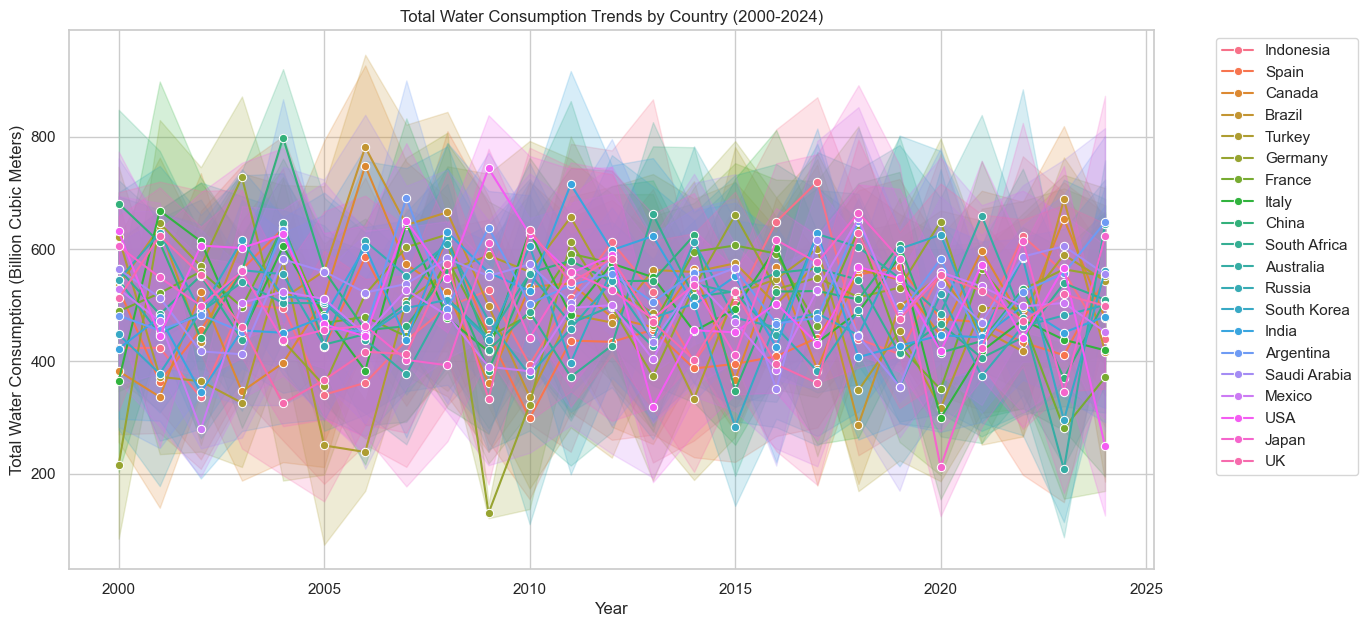

In [27]:

# Load the cleaned data WITH the "Country" column
df = pd.read_csv("cleaned_water_data_with_country.csv")

# Now, this will work:
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=df, 
    x="Year", 
    y="Total Water Consumption (Billion Cubic Meters)", 
    hue="Country",
    marker="o"
)
plt.title("Total Water Consumption Trends by Country (2000-2024)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

Groundwater Depletion vs. Rainfall  Scatter Plot with Regression

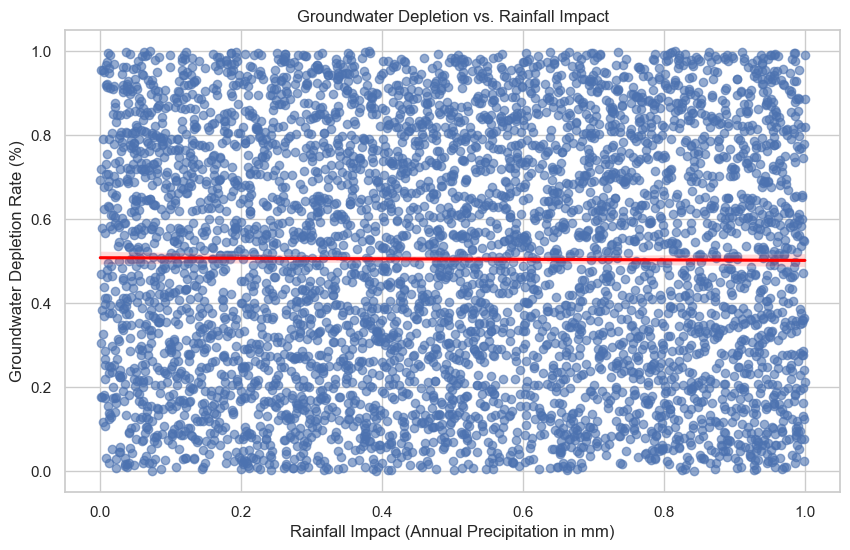

In [15]:
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df,
    x="Rainfall Impact (Annual Precipitation in mm)",
    y="Groundwater Depletion Rate (%)",
    scatter_kws={"alpha": 0.6},
    line_kws={"color": "red"}
)
plt.title("Groundwater Depletion vs. Rainfall Impact")
plt.show()

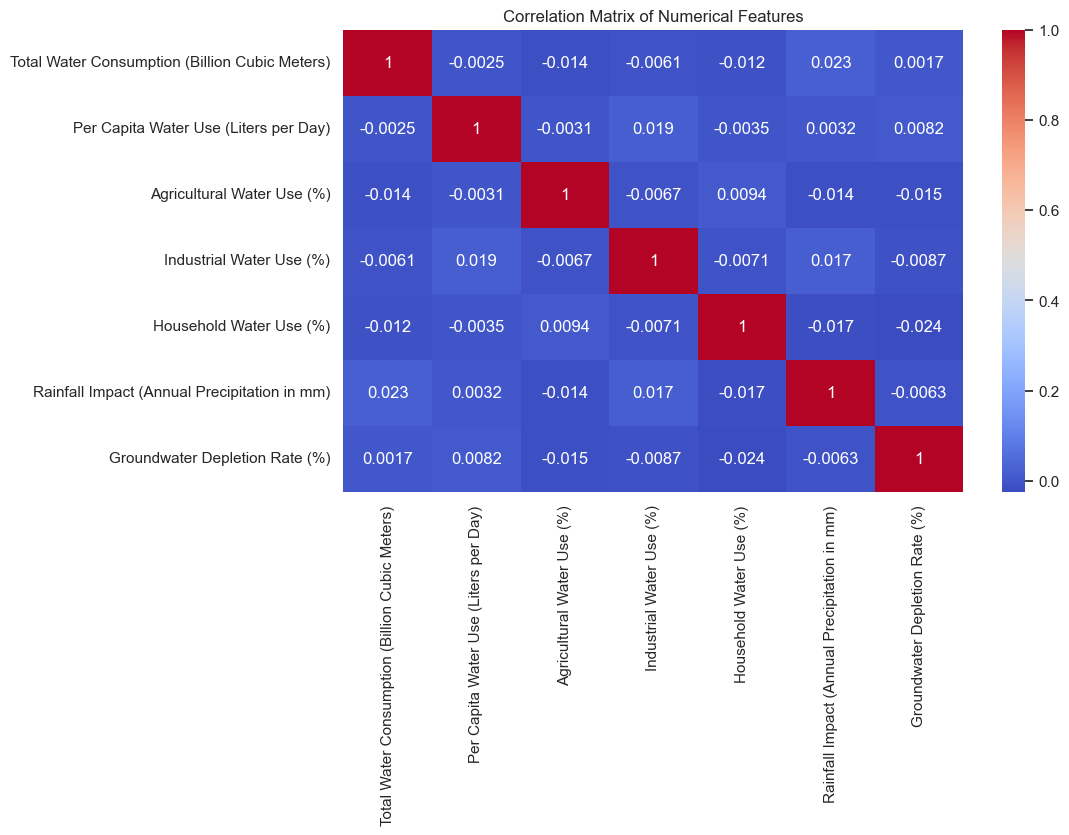

In [17]:
# Select numerical features
numerical_cols = [
    "Total Water Consumption (Billion Cubic Meters)",
    "Per Capita Water Use (Liters per Day)",
    "Agricultural Water Use (%)",
    "Industrial Water Use (%)",
    "Household Water Use (%)",
    "Rainfall Impact (Annual Precipitation in mm)",
    "Groundwater Depletion Rate (%)"
]

plt.figure(figsize=(10, 6))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

Sectoral Water Use Analysis
Stacked Bar Plot by Countr

In [28]:
import pandas as pd

# Load the original dataset (before one-hot encoding)
df = pd.read_csv("global_water_consumption.csv")

# Handle missing values and outliers (as before)...
# ...

# Encode ONLY "Water Scarcity Level", not "Country"
df = pd.get_dummies(df, columns=["Water Scarcity Level"])

# Keep the original "Country" column for grouping

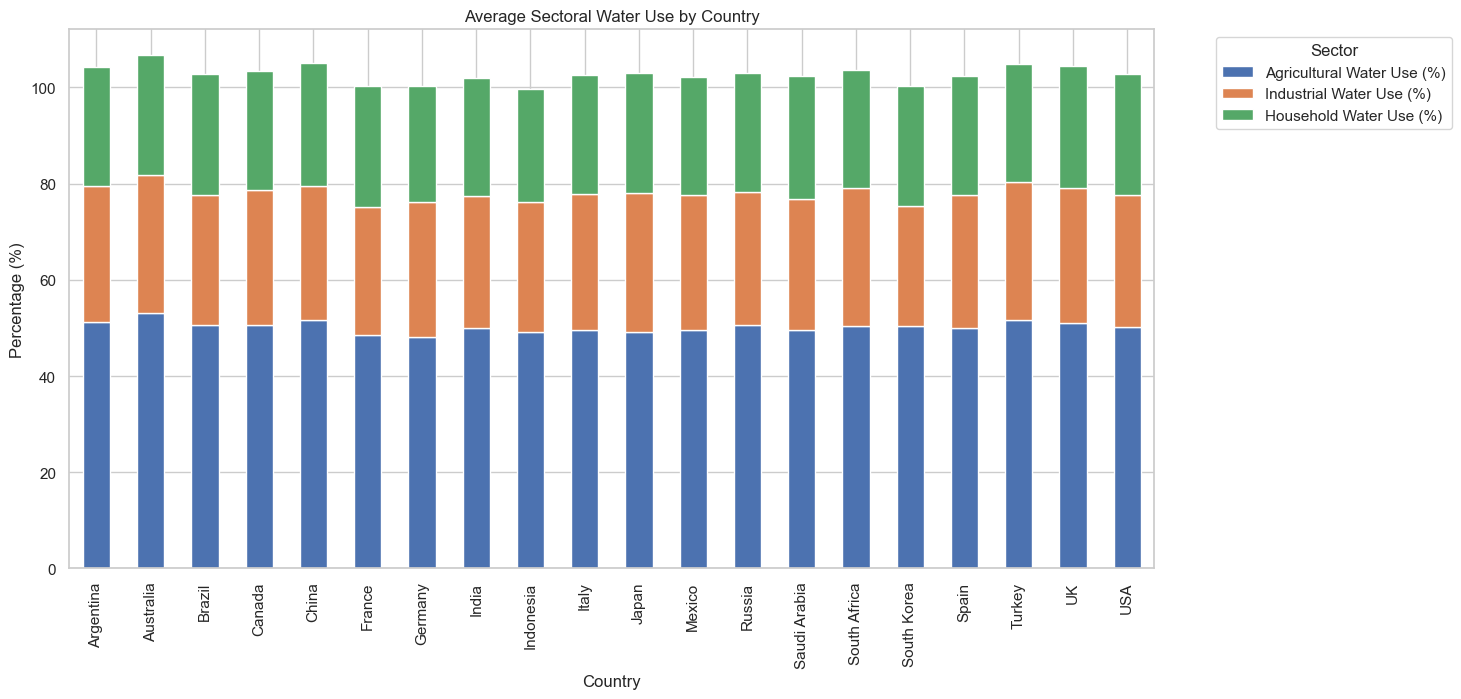

In [29]:
# Aggregate sectoral use by country (now works!)
sector_use = df.groupby("Country")[["Agricultural Water Use (%)", "Industrial Water Use (%)", "Household Water Use (%)"]].mean()

# Plot
sector_use.plot(kind="bar", stacked=True, figsize=(14, 7))
plt.title("Average Sectoral Water Use by Country")
plt.ylabel("Percentage (%)")
plt.legend(title="Sector", bbox_to_anchor=(1.05, 1))
plt.show()

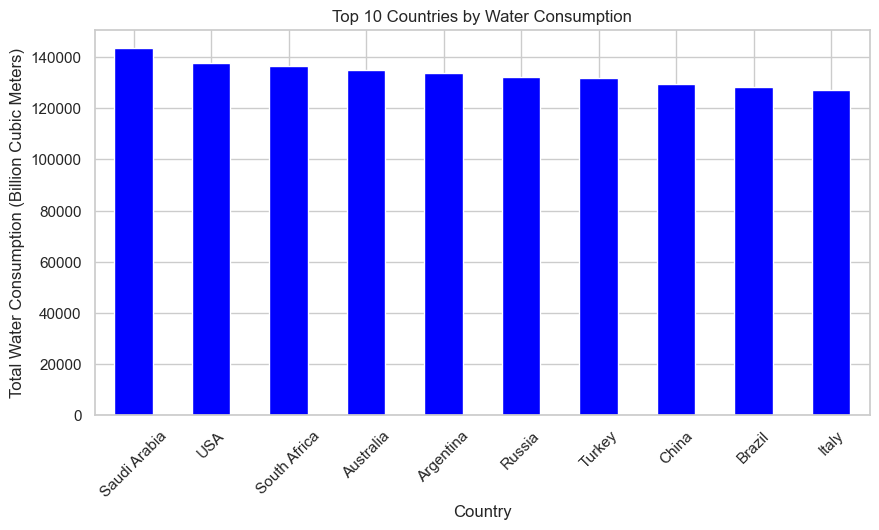

In [34]:
# Top 10 countries with highest water consumption
top_countries = df.groupby("Country")["Total Water Consumption (Billion Cubic Meters)"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
top_countries.plot(kind='bar', color='blue')
plt.title('Top 10 Countries by Water Consumption')
plt.ylabel('Total Water Consumption (Billion Cubic Meters)')
plt.xticks(rotation=45)
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_8128\716774130.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


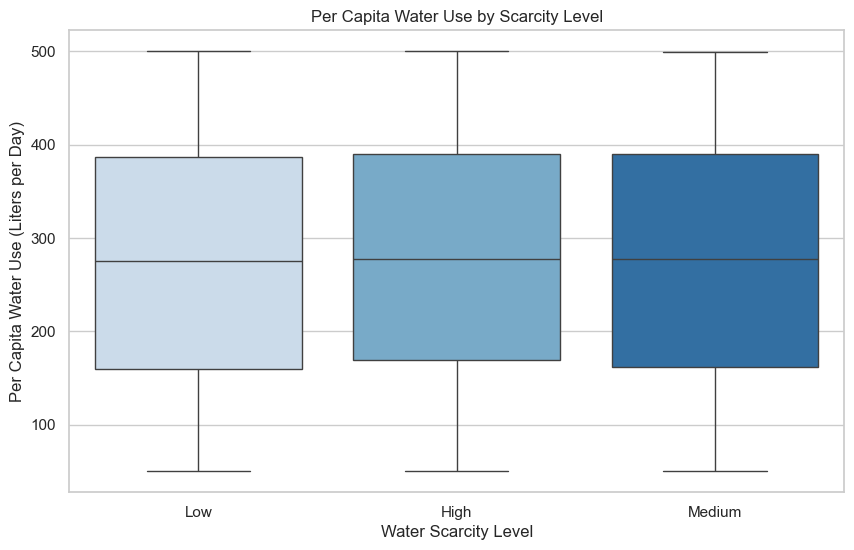

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df, 
    x="Water Scarcity Level",  # ✅ Verified correct from your columns
    y="Per Capita Water Use (Liters per Day)",  # 🚨 Added missing closing parenthesis
    palette="Blues"
)
plt.title("Per Capita Water Use by Scarcity Level")
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_8128\3553984697.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Water Scarcity Level', palette='coolwarm')


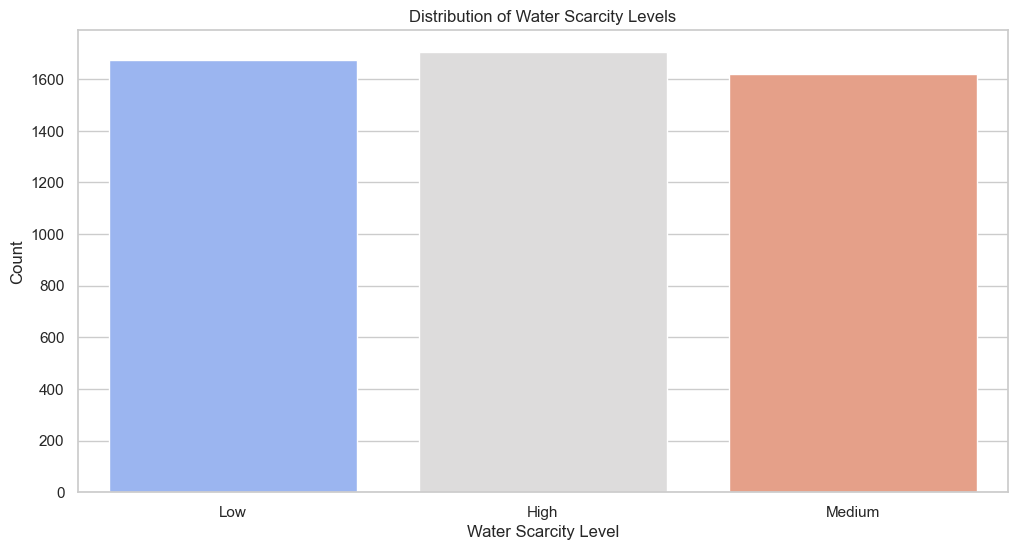

In [35]:
# Water Scarcity Level Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Water Scarcity Level', palette='coolwarm')
plt.title('Distribution of Water Scarcity Levels')
plt.xlabel('Water Scarcity Level')
plt.ylabel('Count')
plt.show()

Water Scarcity Distribution

In [36]:
print(df.columns)

Index(['Country', 'Year', 'Total Water Consumption (Billion Cubic Meters)',
       'Per Capita Water Use (Liters per Day)', 'Water Scarcity Level',
       'Agricultural Water Use (%)', 'Industrial Water Use (%)',
       'Household Water Use (%)',
       'Rainfall Impact (Annual Precipitation in mm)',
       'Groundwater Depletion Rate (%)'],
      dtype='object')


Groundwater Depletion Over Time
Facet Grid by Country:

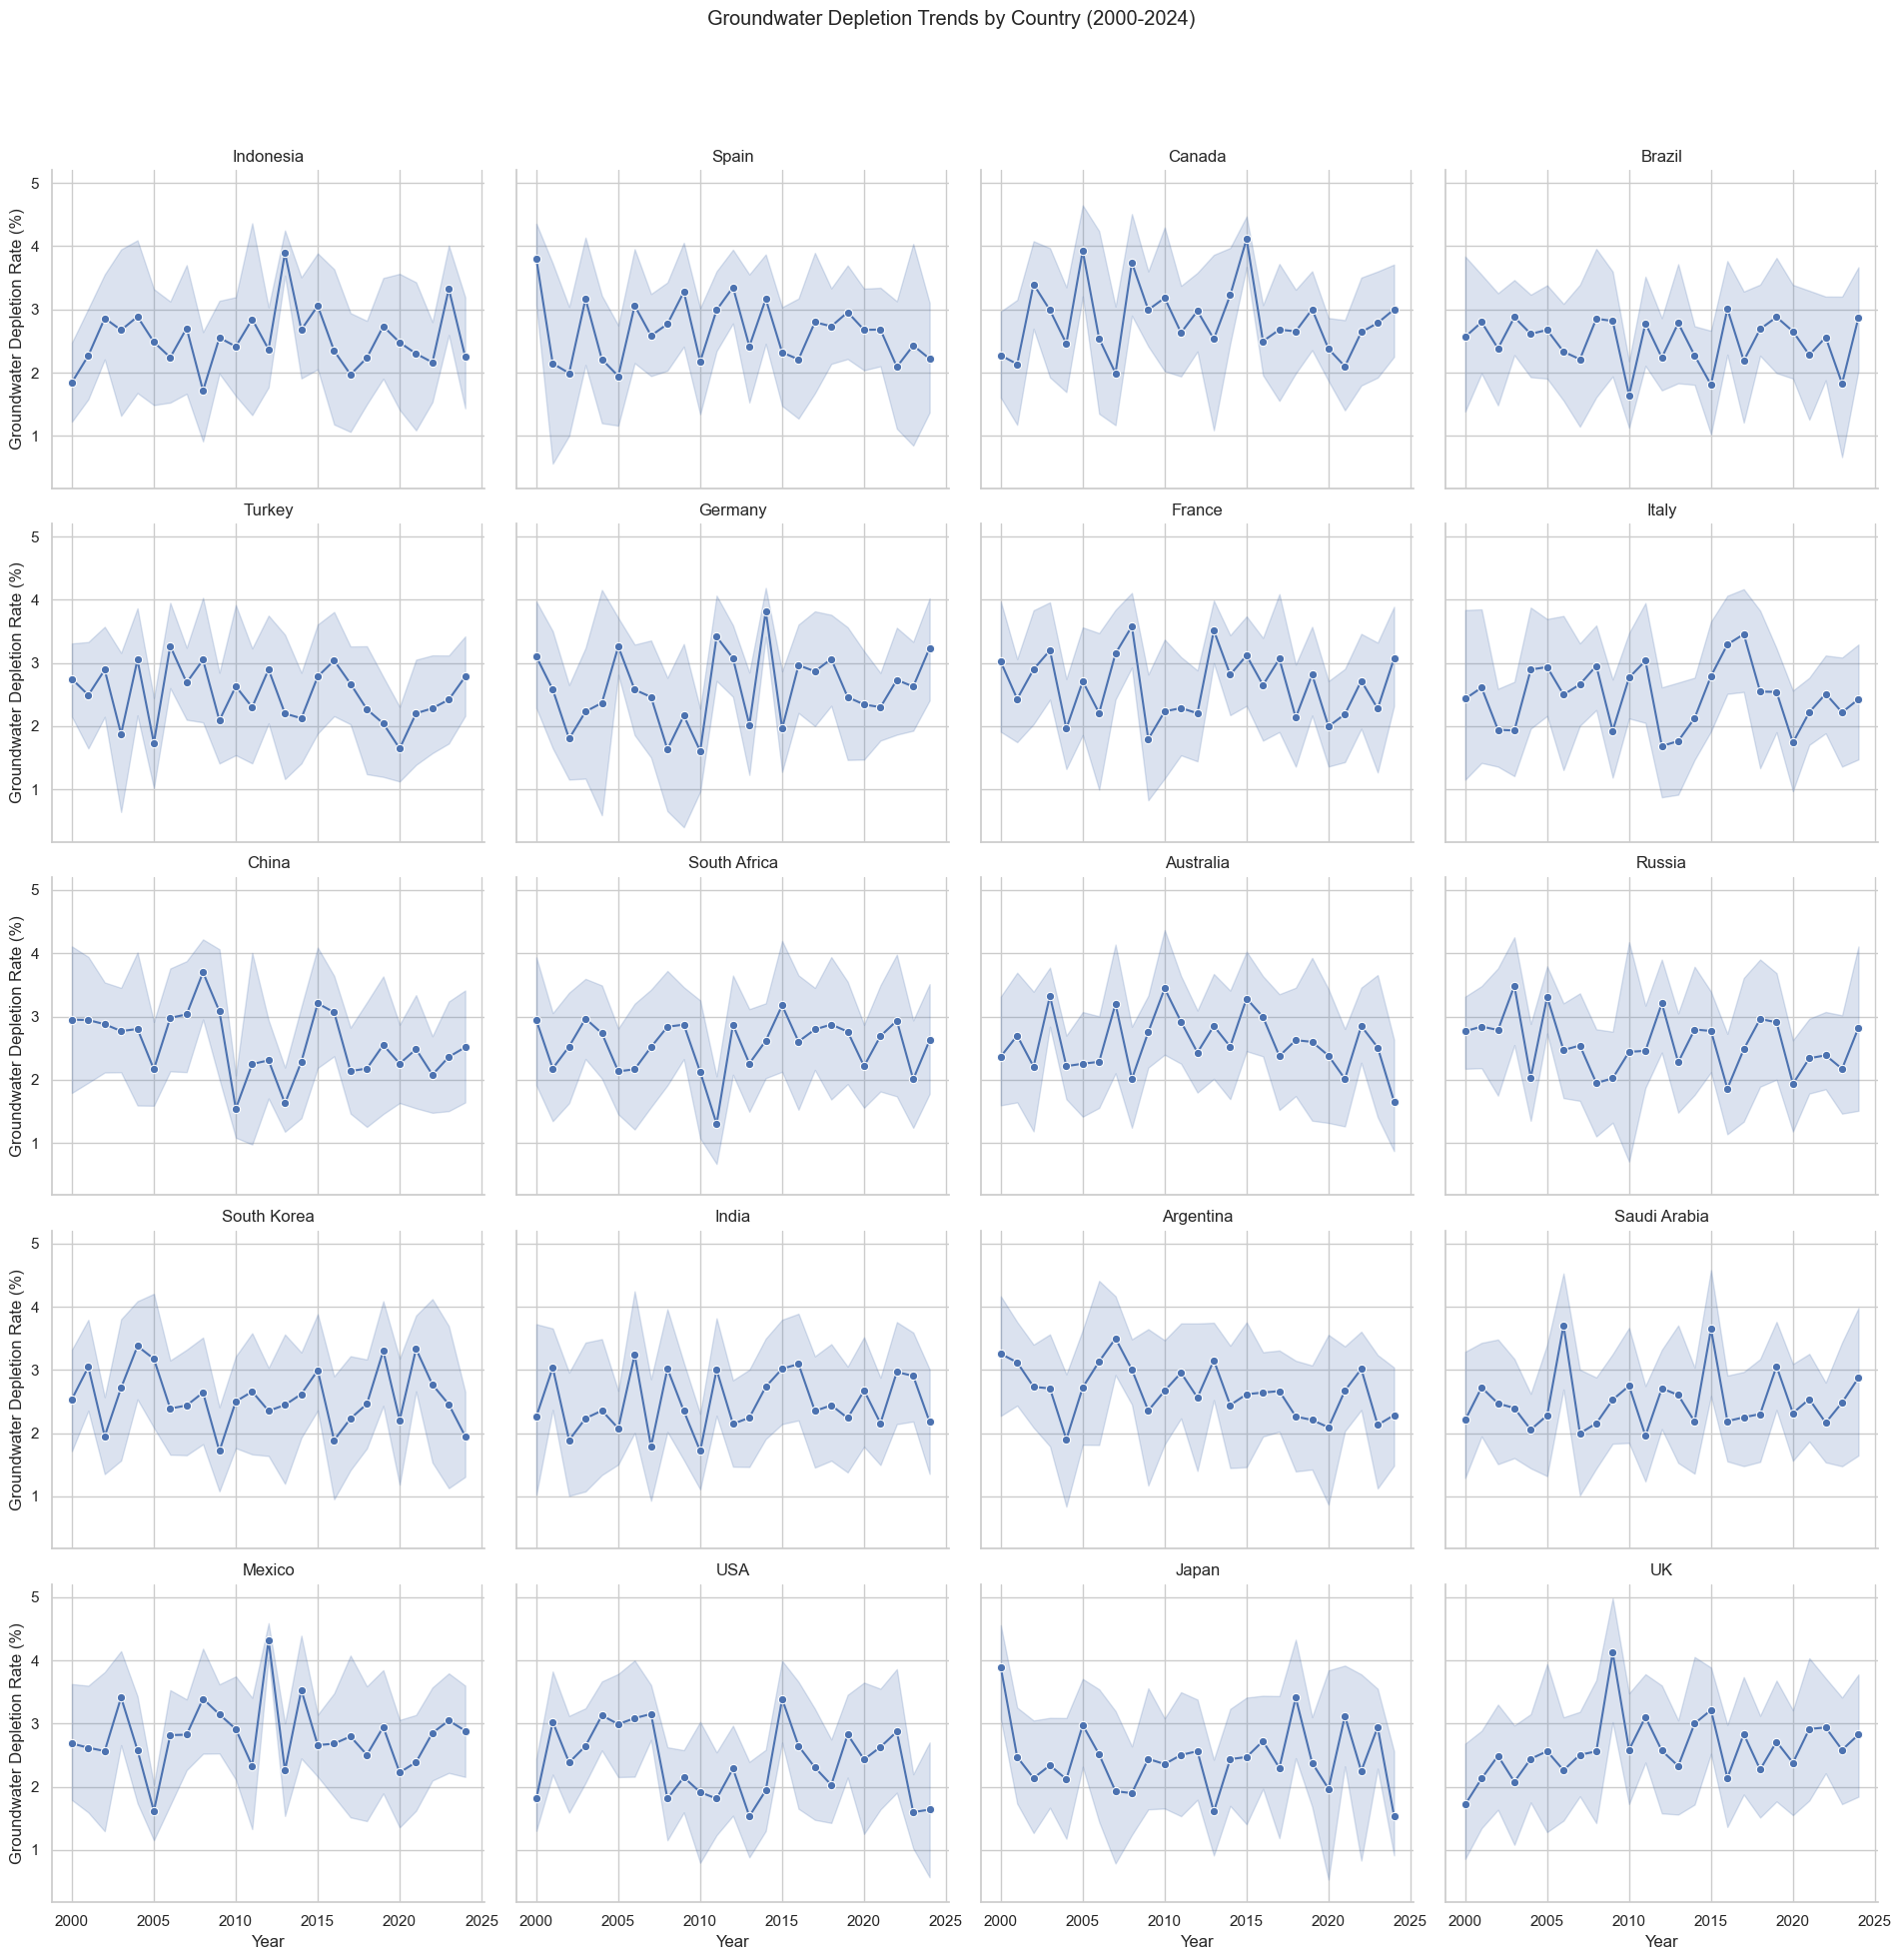

In [44]:
g = sns.FacetGrid(df, col="Country", col_wrap=4, height=4, aspect=1.2)
g.map(sns.lineplot, "Year", "Groundwater Depletion Rate (%)", marker="o")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Groundwater Depletion Trends by Country (2000-2024)")
plt.show()

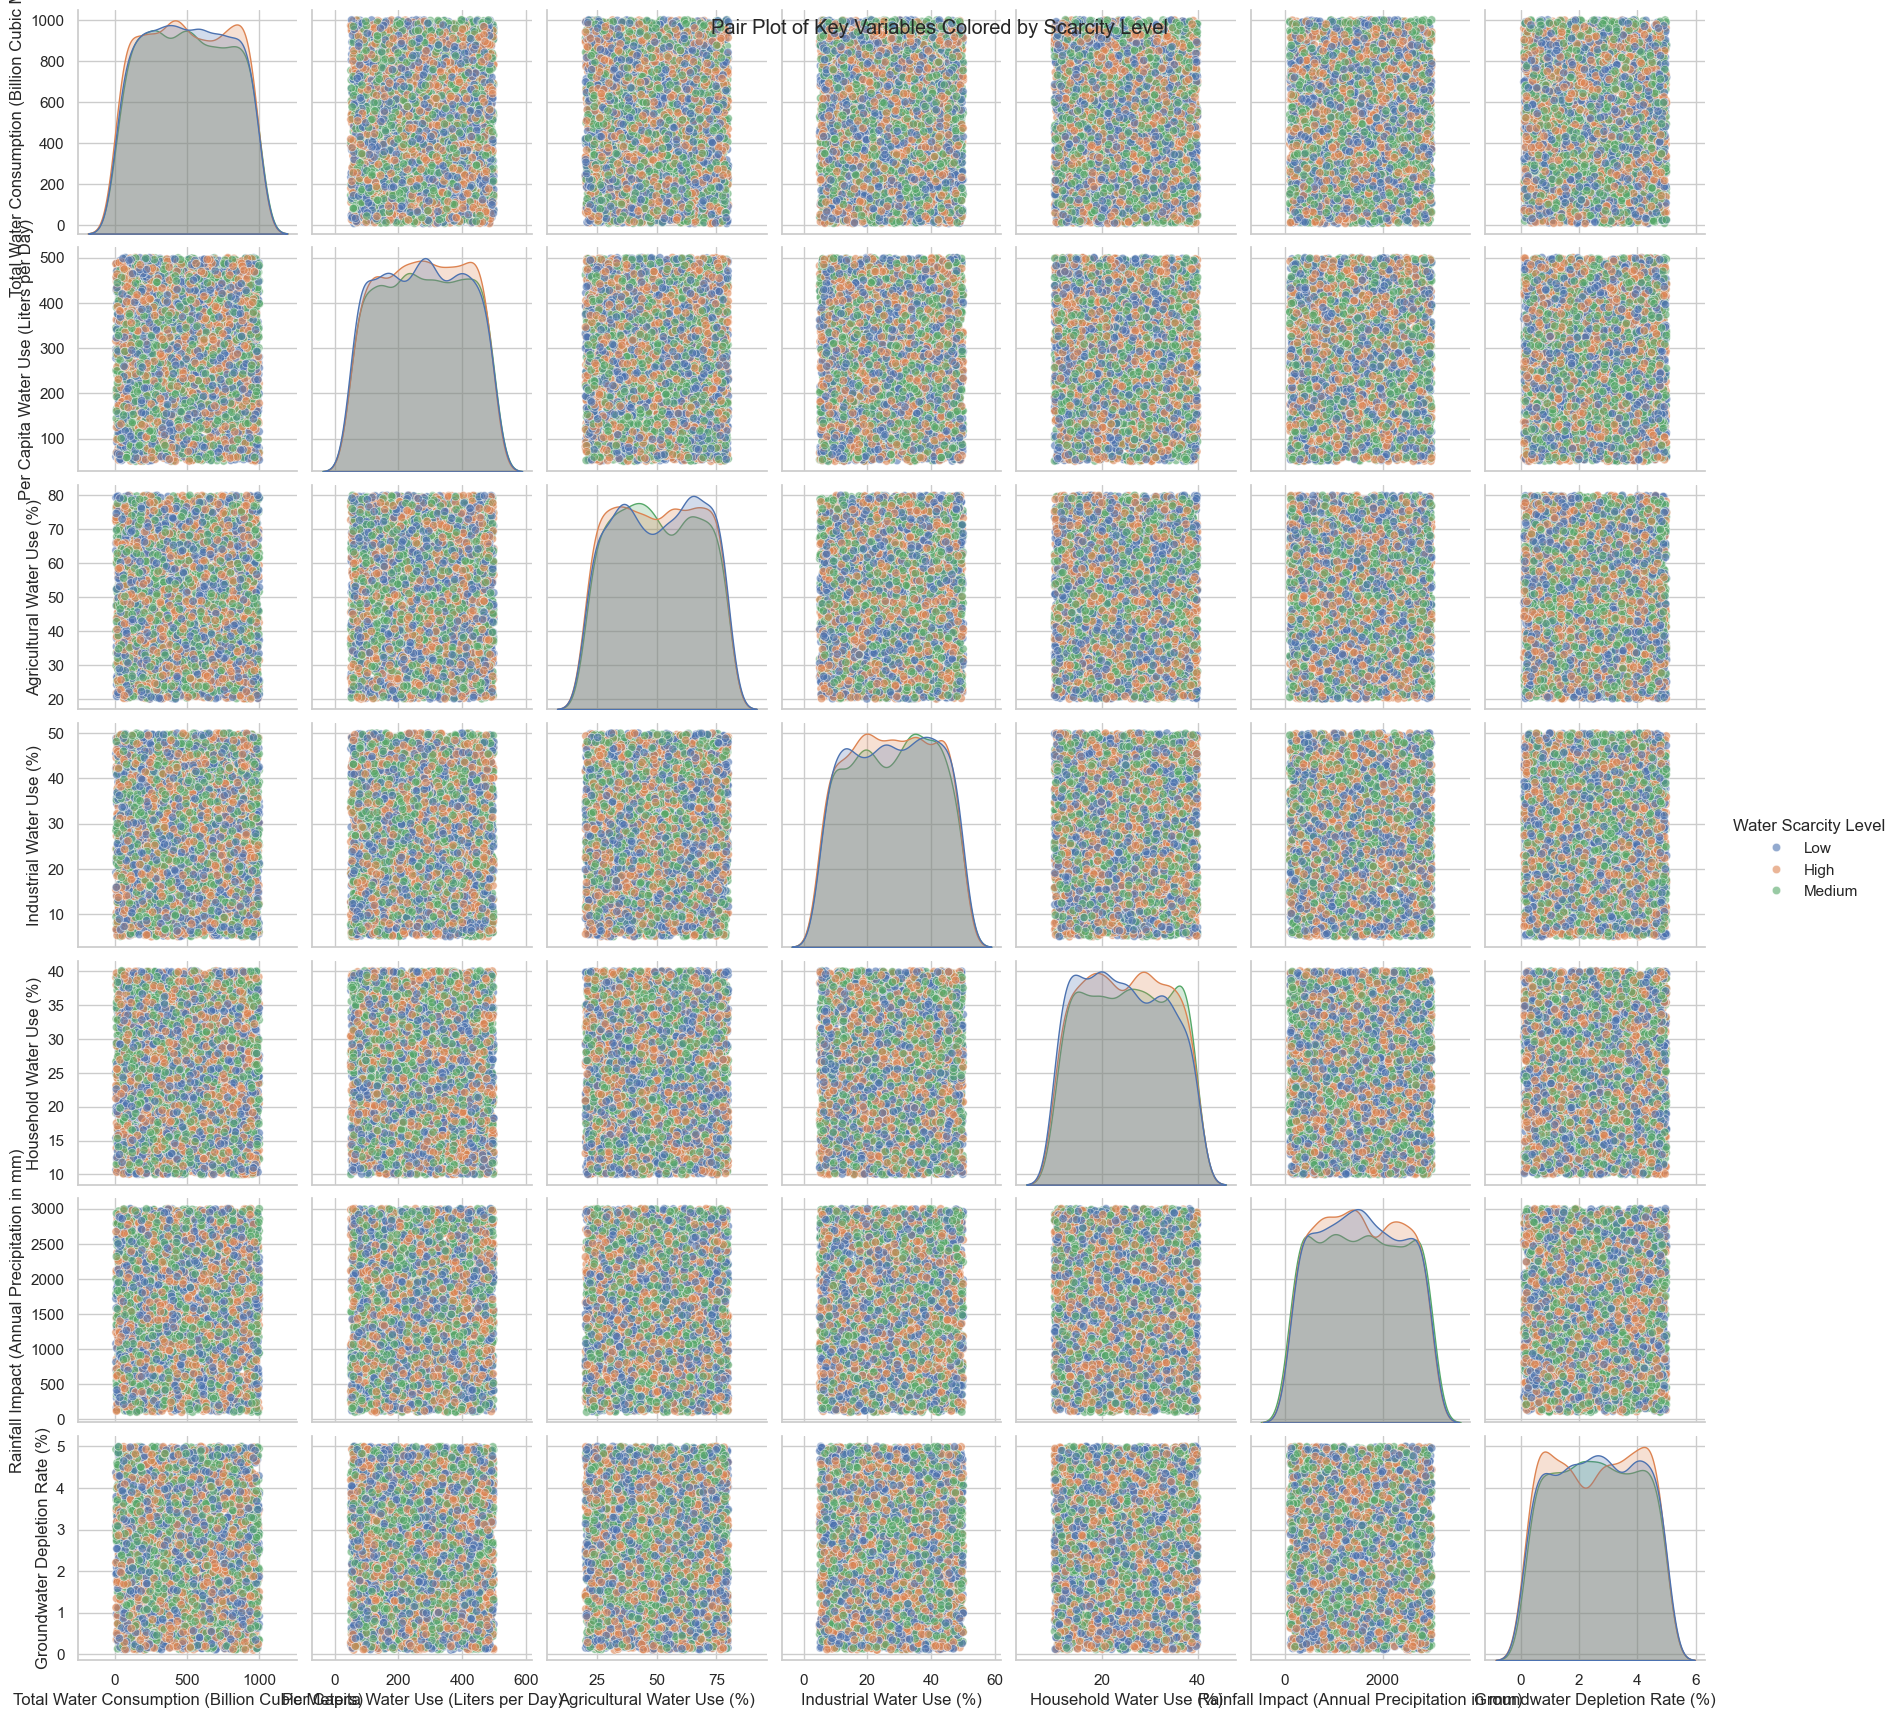

In [45]:
sns.pairplot(
    df[numerical_cols + ['Water Scarcity Level']], 
    hue='Water Scarcity Level', 
    diag_kind="kde",
    plot_kws={"alpha": 0.6}
)
plt.suptitle("Pair Plot of Key Variables Colored by Scarcity Level")
plt.show()

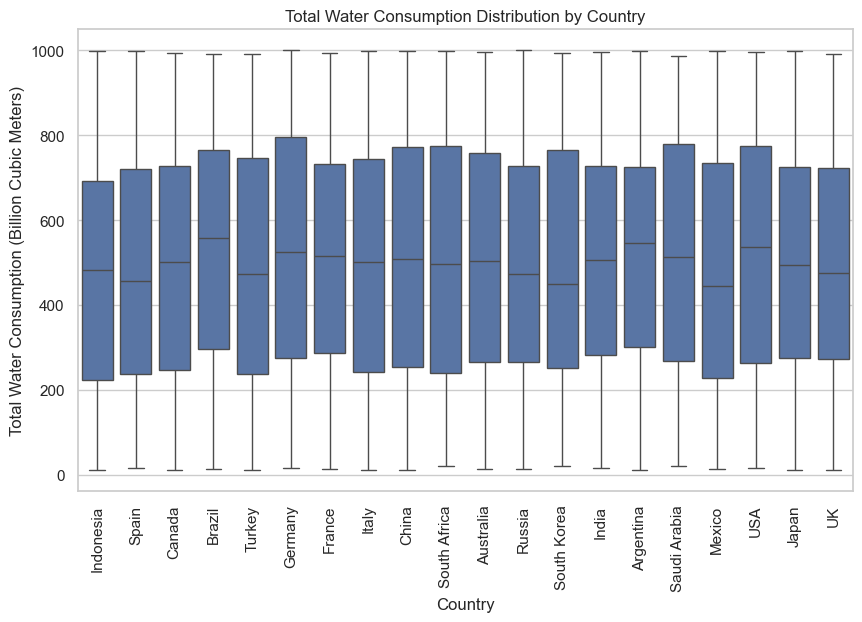

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(df, x="Country", y="Total Water Consumption (Billion Cubic Meters)")
plt.xticks(rotation=90)
plt.title("Total Water Consumption Distribution by Country")
plt.show()

Model Training

In [53]:
# Rename the columns
data.columns = ['Country', 'Year', 'Total Water Consumption', 'Per Capita Water Use', 
                'Water Scarcity Level', 'Agricultural Use', 'Industrial Use', 
                'Household Use', 'Rainfall Impact', 'Groundwater Depletion']

# Now select features
X = data[['Year', 'Per Capita Water Use', 'Agricultural Use', 'Industrial Use', 
          'Household Use', 'Rainfall Impact', 'Groundwater Depletion']]

y = data['Total Water Consumption']

In [ ]:
NameError: name 'model' is not defined

Create Time Series Windows for LSTM

In [58]:
print(data.columns)

Index(['Country', 'Year', 'Total Water Consumption', 'Per Capita Water Use',
       'Water Scarcity Level', 'Agricultural Use', 'Industrial Use',
       'Household Use', 'Rainfall Impact', 'Groundwater Depletion'],
      dtype='object')


In [61]:
# Updated feature names based on your current dataset
features = ['Per Capita Water Use', 
            'Agricultural Use', 
            'Industrial Use', 
            'Household Use', 
            'Rainfall Impact', 
            'Groundwater Depletion']

target = 'Total Water Consumption'

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[features + [target]])

# Convert to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=features + [target])

In [6]:
import pandas as pd
import plotly.express as px

# Step 1: Load the data into a DataFrame
df = pd.read_csv("global_water_consumption.csv")

# Step 2: Rename the column
df.rename(columns={"Total Water Consumption (Billion Cubic Meters)": "Water Consumption"}, inplace=True)

# Step 3: Verify the renaming
print(df.columns)

# Step 4: Create the choropleth map
fig = px.choropleth(df, 
                    locations="Country", 
                    locationmode="country names",  
                    color="Water Consumption", 
                    hover_name="Country",  
                    animation_frame="Year", 
                    color_continuous_scale="Viridis")

# Display the map
fig.show(renderer="iframe")

Index(['Country', 'Year', 'Water Consumption',
       'Per Capita Water Use (Liters per Day)', 'Water Scarcity Level',
       'Agricultural Water Use (%)', 'Industrial Water Use (%)',
       'Household Water Use (%)',
       'Rainfall Impact (Annual Precipitation in mm)',
       'Groundwater Depletion Rate (%)'],
      dtype='object')
